# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [11]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv(r'C:\Users\ali\Documents\belajar\tugas dikumpul\train_house.csv', index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Drop variabel NaN
house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [205]:
# Memisahkan data menjadi numerikal & kategorikal
# Numerikal
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.to_csv('house_numeric.csv')
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [39]:
# Memisahkan data menjadi numerikal & kategorikal
# Kategorikal
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.to_csv('house_categorical.csv')
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization 

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

In [72]:
house_categorical = pd.read_csv('house_categorical.csv',index_col=0)
house_numerical = pd.read_csv('house_numeric.csv',index_col=0)

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


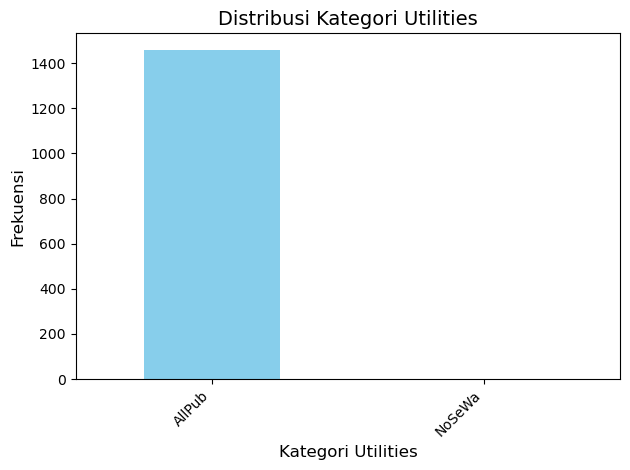

In [209]:
### Tulis kode Anda di sini
print(house['Utilities'].value_counts())
utility_counts = house_categorical['Utilities'].value_counts()
colors = ['skyblue', 'lightgreen']
utility_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori Utilities', fontsize=14)
plt.xlabel('Kategori Utilities', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


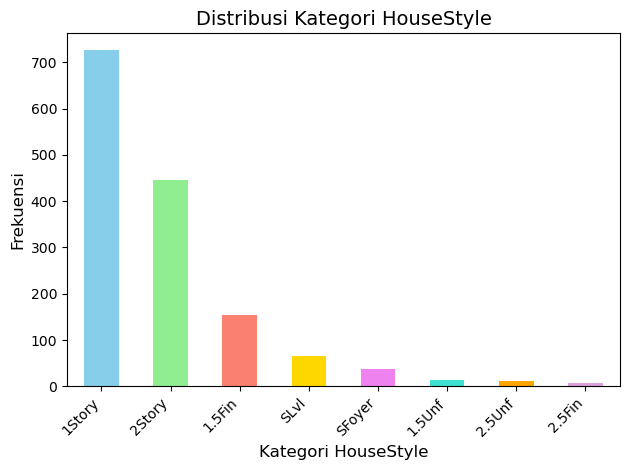

In [211]:
### Tulis kode Anda di sini
print(house['HouseStyle'].value_counts())
HouseStyle_counts = house_categorical['HouseStyle'].value_counts()
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet', 'turquoise', 'orange', 'plum']
HouseStyle_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori HouseStyle', fontsize=14)
plt.xlabel('Kategori HouseStyle', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


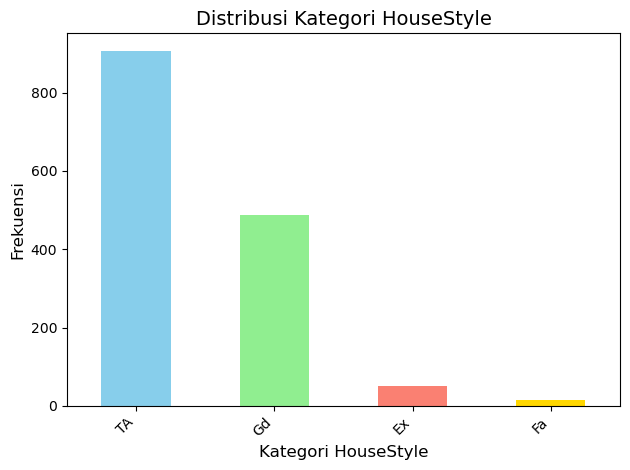

In [213]:
### Tulis kode Anda di sini
print(house['ExterQual'].value_counts())
ExterQual_counts = house_categorical['ExterQual'].value_counts()
colors = ['skyblue', 'lightgreen', 'salmon', 'gold']
ExterQual_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori HouseStyle', fontsize=14)
plt.xlabel('Kategori HouseStyle', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Analisis tentang variabel kategorikal**

**Utilities** = Hanya ada 2 kategori di keseluruhan utilities yaitu AllPub berjumlah 1459 unit dan NoSeWa 1 unit. sehingga hampir keseluruhanya adalah allpub dan kategori NoSewa hampir tidak terlihat di bar cart karna terlalu sedikit dibanding Allpub

**HouseStyle** = Hanya ada 8 kategori di keseluruhan utilities dengan jumlah yaitu:
*                1Story    726 unit
*                2Story    445 unit
*                1.5Fin    154 unit
*                SLvl       65 unit
*                SFoyer     37 unit
*                1.5Unf     14 unit
*                2.5Unf     11 unit
*                2.5Fin      8 unit

* Grafik menunjukkan distribusi berbagai gaya rumah dalam dataset, dengan kategori 1Story menjadi yang paling umum, diikuti oleh 2Story dan 1.5Fin.
* Kategori seperti SLvl (Split Level), SFoyer (Split Foyer), 1.5Unf, 2.5Unf, dan 2.5Fin memiliki frekuensi lebih rendah dibandingkan dengan kategori yang lebih umum.
* Distribusi ini dapat memberikan wawasan tentang preferensi pasar terhadap tipe rumah tertentu dan bagaimana tipe rumah yang kurang umum mungkin memiliki karakteristik unik atau pasar yang lebih spesifik.
  
**ExterQual** = Kualitas material eksterior Hanya ada 4 kategori di keseluruhan utilities dengan jumlah yaitu:
* TA  Excellent       906
* Gd  Good            488
* Ex  Average/Typical 52
* Fa  Fair            14

* Grafik menunjukkan distribusi kategori kualitas keseluruhan rumah dalam dataset, dengan kategori TA (Typical/Average) sebagai yang paling dominan, diikuti oleh Gd (Good), Ex (Excellent), dan Fa (Fair).
* Kategori TA memiliki jumlah yang sangat tinggi dibandingkan dengan kategori lainnya, menunjukkan bahwa mayoritas rumah berada dalam kondisi rata-rata.
* Gd juga cukup umum, menandakan adanya sejumlah besar rumah dengan kualitas di atas rata-rata.
* Ex dan Fa memiliki frekuensi yang lebih rendah, menunjukkan bahwa hanya sedikit rumah yang memiliki kualitas sangat tinggi atau justru berada di bawah standar.
* Distribusi ini memberikan wawasan penting terkait persebaran kualitas rumah dan bagaimana hal ini mungkin berkorelasi dengan faktor lain seperti harga dan minat pasar.
 

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


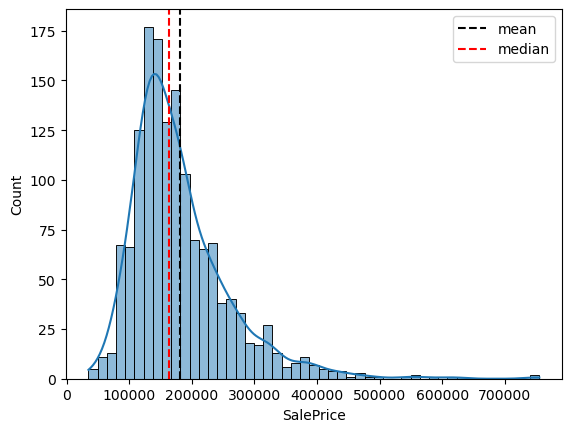

In [223]:
### Tulis kode Anda di sini
x = house_numeric["SalePrice"]
sns.histplot(x, kde=True)
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median:", x.median())
# Mean
print("Mean:", x.mean())
# Std Dev
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**
* Distribusi *right-skewed*.
* Kebanyakan data berada dalam range sekitar 100,000 sampai 300,000. Apakah ini wajar untuk harga rumah di US?
* Nilai selalu positif. Namun, kalau dimasukkan ke model ML hasil prediksi bisa jadi negatif kalau salah.
* Kita akan coba transformasi dengan log-scale.
    * Membuat distribusi terlihat seperti distribusi normal.
    * Memaksa nilai harga selalu positif, bahkan ketika dimasukkan kedalam model.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


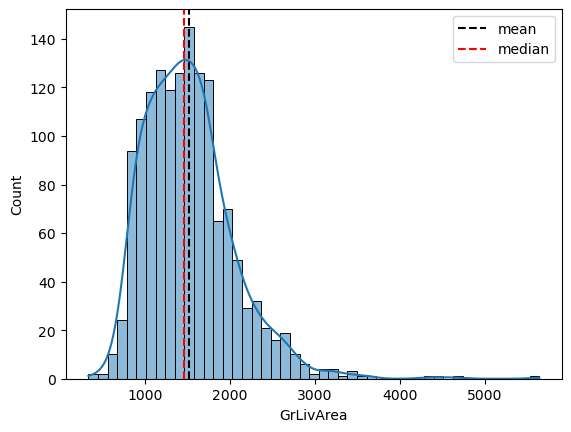

In [225]:
### Tulis kode Anda di sini
x = house_numeric["GrLivArea"]
sns.histplot(x, kde=True)
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median:", x.median())
# Mean
print("Mean:", x.mean())
# Std Dev
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

Analisis Histogram GrLivArea:

* Histogram menunjukkan distribusi luas area hunian dengan mayoritas data terkonsentrasi di sekitar nilai rata-rata (1515.46) dan median (1464.0).

* Distribusi bersifat right-skewed, yang berarti ada beberapa rumah dengan luas lebih besar yang kurang umum dibandingkan dengan mayoritas rumah lainnya.

* Garis hitam putus-putus menunjukkan nilai rata-rata, sedangkan garis merah putus-putus menunjukkan nilai median.

* Standar deviasi (525.48) menunjukkan tingkat variasi dalam ukuran area hunian.

Pertanyaan yang dapat diajukan:

* Apa dampak dari distribusi yang tidak simetris (right-skewed) terhadap analisis harga rumah?

* Apakah rumah dengan luas lebih besar memiliki pola harga yang berbeda dibandingkan rumah dengan luas mendekati median?

* Apakah terdapat outlier dalam data yang perlu dianalisis lebih lanjut?

* Bagaimana distribusi ini dibandingkan dengan karakteristik geografis atau jenis properti tertentu?

* Apakah ada faktor lain (misalnya lokasi, kondisi properti) yang dapat memengaruhi nilai luas hunian?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Median: 480.0
Mean: 472.9801369863014
Std Dev: 213.80484145338076


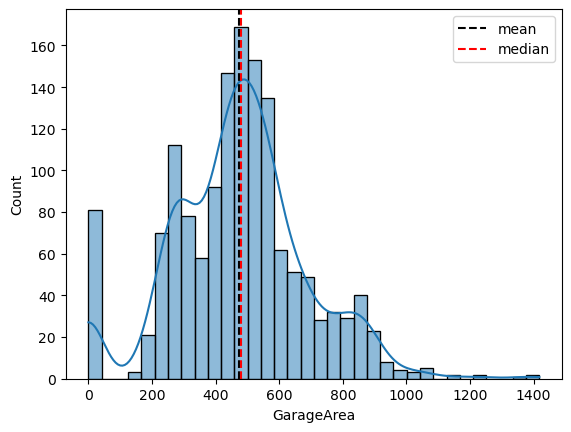

In [173]:
### Tulis kode Anda di sini
x = house_numeric["GarageArea"]
sns.histplot(x, kde=True)
plt.xlabel(x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median:", x.median())
# Mean
print("Mean:", x.mean())
# Std Dev
print("Std Dev:", x.std())
plt.show()

#### **Analisis tentang variabel `GarageArea`**

Analisis Histogram GarageArea:

* Histogram menunjukkan distribusi luas garasi dalam dataset, dengan mayoritas nilai terkonsentrasi di sekitar rata-rata (472.98) dan median (480.0).

* Distribusi terlihat cukup seimbang, tanpa skewness yang ekstrem ke kanan atau kiri.

* Standar deviasi (213.80) menunjukkan variasi ukuran garasi yang cukup tinggi, menandakan adanya rumah dengan garasi yang jauh lebih besar dibandingkan mayoritas lainnya.

* Garis hitam putus-putus menunjukkan rata-rata, sedangkan garis merah putus-putus menunjukkan median, membantu dalam memahami kecenderungan ukuran garasi dalam dataset.

Pertanyaan yang dapat diajukan:

* Apakah ukuran garasi berkorelasi dengan harga rumah dalam dataset ini?

* Apakah ada outlier atau nilai ekstrem yang dapat memberikan wawasan tambahan tentang properti dengan garasi besar atau kecil?

* Bagaimana distribusi ini dibandingkan dengan karakteristik geografis atau jenis rumah tertentu?

* Apakah luas garasi memengaruhi minat pembeli atau nilai jual properti secara signifikan?

* Apakah ada pola atau tren tertentu yang menunjukkan hubungan antara luas garasi dan fitur lainnya dalam properti?

## Pemrosesan Data Variabel Numerikal

Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


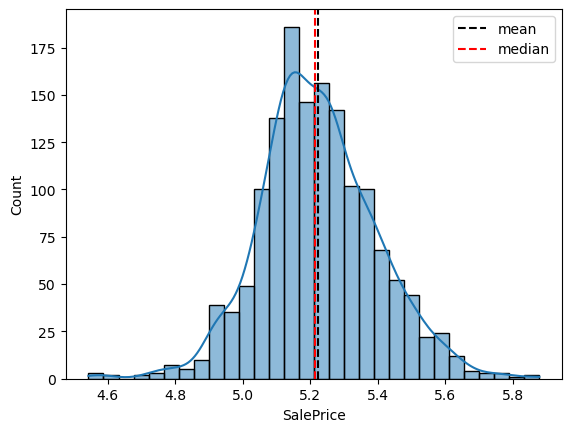

In [227]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
x = np.log10(house_numerical["SalePrice"])
sns.histplot(x, kde=True, bins=30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median:", x.median())
# Mean
print("Mean:", x.mean())
# Std Dev
print("Std Dev:", x.std())
plt.show()

Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


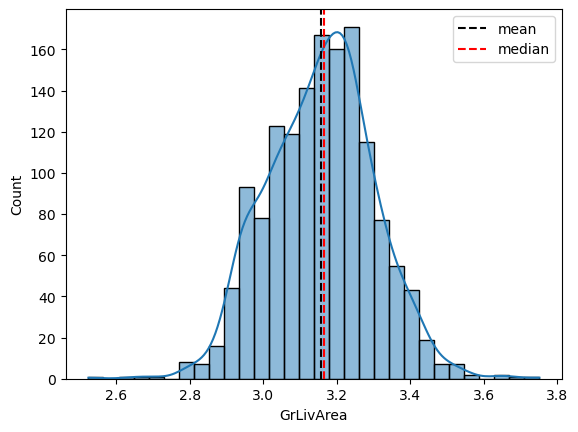

In [231]:
# Transformasi log-10 GrLivArea
x = np.log10(house_numerical["GrLivArea"])
### Tulis kode Anda di sini
sns.histplot(x, kde=True, bins=30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
# Median
print("Median:", x.median())
# Mean
print("Mean:", x.mean())
# Std Dev
print("Std Dev:", x.std())
plt.show()

Median: 2.6848453616444123
Mean: 2.6696154158200915
Std Dev: 0.16427840573730204


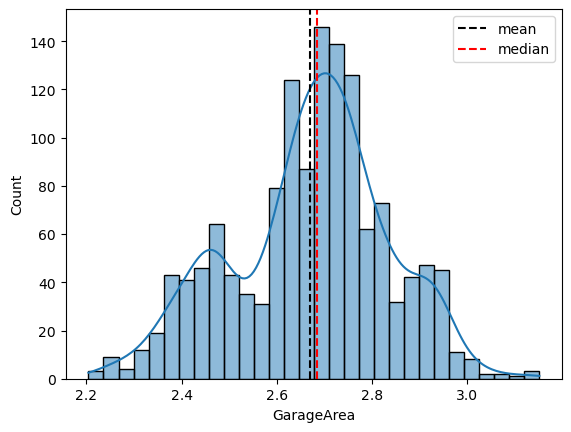

In [233]:
# Menghilangkan nilai nol pada GarageArea
garage_area_nonzero = house_numerical["GarageArea"][house_numerical["GarageArea"] > 0]

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(garage_area_nonzero)
sns.histplot(x, kde=True, bins=30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

Transformasi log-10 adalah teknik statistik untuk mengubah nilai agar distribusinya lebih mendekati normal (simetris).
tetapi perlu dilakukan penyisihan nilai nol sebelum melakukan log-10 karna akan menimbulkan:
* Mean jadi -inf (tak hingga negatif)
* Std Dev jadi nan (bukan angka)
* Plot histogram bisa rusak

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
house_categorical = pd.read_csv('house_categorical.csv',index_col=0)
house_numerical = pd.read_csv('house_numeric.csv',index_col=0)

# `GrLivArea` dengan `SalePrice`

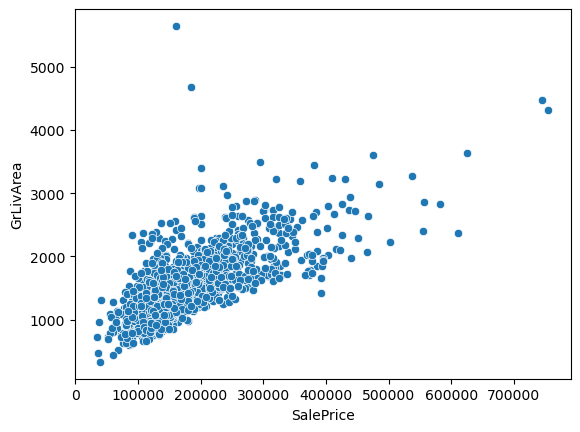

In [247]:
#ax = sns.scatterplot(### Tulis kode Anda di sini)

ax = sns.scatterplot(y="GrLivArea", x="SalePrice", data=house_numerical)
plt.show()

# `GarageArea` dengan `SalePrice`

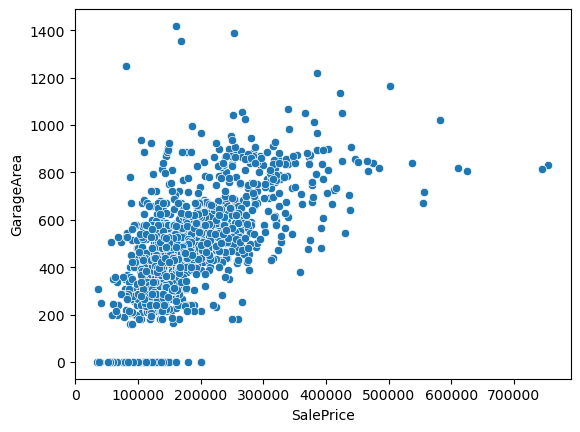

In [249]:
ax = sns.scatterplot(y="GarageArea", x="SalePrice", data=house_numerical)
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

##### **Hipotesis tentang Hubungan GrLivArea dan SalePrice:**

Hipotesis Nol (H₀): Tidak ada hubungan yang signifikan antara luas area hunian di atas tanah (GrLivArea) dan harga jual rumah (SalePrice). Variasi dalam GrLivArea tidak memiliki pengaruh terhadap perubahan SalePrice.

Hipotesis Alternatif (H₁): Terdapat hubungan positif yang signifikan antara GrLivArea dan SalePrice. Semakin besar luas area hunian, semakin tinggi harga jual rumah.

##### **Dugaan Pendukung Hipotesis Alternatif:**

* Scatter plot menunjukkan tren positif, mengindikasikan bahwa rumah dengan GrLivArea yang lebih luas cenderung memiliki harga jual lebih tinggi.
* Hubungan ini mungkin mengikuti pola ekonomi pasar properti, di mana luas rumah menjadi salah satu faktor utama dalam menentukan harga jual.
* Faktor lain seperti lokasi, kondisi rumah, dan kualitas bangunan juga bisa mempengaruhi hubungan ini.
* Untuk menguji hipotesis ini, analisis regresi linear dapat dilakukan guna melihat kekuatan dan signifikansi hubungan antara GrLivArea dan SalePrice. Jika koefisien regresi signifikan secara statistik, maka hipotesis alternatif dapat diterima.


##### **Hipotesis tentang Hubungan GarageArea dengan SalePrice:**

Hipotesis Nol (H₀): Tidak ada hubungan yang signifikan antara luas garasi (GarageArea) dan harga jual rumah (SalePrice). Variasi dalam GarageArea tidak memiliki pengaruh terhadap perubahan harga rumah.

Hipotesis Alternatif (H₁): Terdapat hubungan positif yang signifikan antara GarageArea dan SalePrice. Semakin besar luas garasi, semakin tinggi harga jual rumah.

##### **Dugaan Pendukung Hipotesis Alternatif:**

* Scatter plot menunjukkan pola yang cenderung naik, mengindikasikan bahwa rumah dengan garasi lebih luas memiliki harga jual lebih tinggi.
* Pemilik rumah mungkin menganggap garasi sebagai fitur yang bernilai tinggi, terutama bagi mereka yang memiliki kendaraan lebih dari satu atau membutuhkan ruang tambahan.
* Faktor lain seperti jenis garasi (attached/detached), kondisi bangunan, dan lokasi juga bisa berkontribusi terhadap harga jual rumah.